<a href="https://colab.research.google.com/github/Binitaaaaaa/numpy/blob/main/filling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#data creation
data = {
  "ID": [1,2,3,4,5],
  "Name": ['ram','shyam','kamala','bimala','hari'],
    "Age":[25,20,33,34,31],
    "Location":['kathmandu','kathmandu','pokhara','pokhara','butwal'],
    "Gender":['male','male','female','female','male']
}
value={
    'kathmandu':101,
    'pokhara':103,
    'butwal':105
}
#converting the data intoo dataframe
df = pd.DataFrame(data)
# transforming code __ the gender column splits as gender_male and gender_female
# if the row value matches the column name it becomes 1 otherwise 0
df_transform=pd.get_dummies(df,columns=['Gender'])
print(df_transform)
print(df)


   ID    Name  Age   Location  Gender_female  Gender_male
0   1     ram   25  kathmandu          False         True
1   2   shyam   20  kathmandu          False         True
2   3  kamala   33    pokhara           True        False
3   4  bimala   34    pokhara           True        False
4   5    hari   31     butwal          False         True
   ID    Name  Age   Location  Gender
0   1     ram   25  kathmandu    male
1   2   shyam   20  kathmandu    male
2   3  kamala   33    pokhara  female
3   4  bimala   34    pokhara  female
4   5    hari   31     butwal    male


In [ ]:
 # this method is simpler than hot-transforming it converts male-0 and female-1
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Location']=df['Location'].map(value)
location=df['Location'].unique()
cols=df.columns
print(df)
print(cols)
print(location)
print(df.info())
print(df.describe())

   ID    Name  Age  Location  Gender
0   1     ram   25       101       1
1   2   shyam   20       101       1
2   3  kamala   33       103       0
3   4  bimala   34       103       0
4   5    hari   31       105       1
Index(['ID', 'Name', 'Age', 'Location', 'Gender'], dtype='object')
[101 103 105]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5 non-null      int64 
 1   Name      5 non-null      object
 2   Age       5 non-null      int64 
 3   Location  5 non-null      int64 
 4   Gender    5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 328.0+ bytes
None
             ID       Age   Location    Gender
count  5.000000   5.00000    5.00000  5.000000
mean   3.000000  28.60000  102.60000  0.600000
std    1.581139   5.94138    1.67332  0.547723
min    1.000000  20.00000  101.00000  0.000000
25%    2.000000  25.00000  101.00000

In [ ]:
import pandas as pd
import numpy as np
data = {
  "ID": [1,2,3,4,5],
  "Name": ['ram','shyam','kamala','bimala','hari'],
    "Age":[25,20,np.nan,34,31],
    "Location":['kathmandu','kathmandu','pokhara','pokhara',np.NaN],
    "Salary":[35000,36000,63000,np.NaN,50000]
}
df = pd.DataFrame(data)
mean=df['Age'].mean()
print(mean)
df.fillna({'Age':mean},inplace= True)
print(df)

27.5
   ID    Name   Age   Location   Salary
0   1     ram  25.0  kathmandu  35000.0
1   2   shyam  20.0  kathmandu  36000.0
2   3  kamala  27.5    pokhara  63000.0
3   4  bimala  34.0    pokhara      NaN
4   5    hari  31.0        NaN  50000.0


In [ ]:


# Calculating the median
median = df['Salary'].median()

# Filling missing values in the 'Salary' column with the calculated median
df.fillna({'Salary': median}, inplace=True)

# Printing the resulting DataFrame to verify changes
print(df)


   ID    Name  Age   Location   Salary
0   1     ram   25  kathmandu  35000.0
1   2   shyam   20  kathmandu  36000.0
2   3  kamala   33    pokhara  63000.0
3   4  bimala   34    pokhara  43000.0
4   5    hari   31        NaN  50000.0


In [ ]:


# Creating a DataFrame
df = pd.DataFrame(data)

# Calculating the mode
mode = df['Location'].mode()  # The result is a Series, as there may be multiple modes

# Filling the missing value in the 'Location' column
df['Location'] = df['Location'].fillna(mode[0])
print(df)



   ID    Name  Age   Location   Salary
0   1     ram   25  kathmandu  35000.0
1   2   shyam   20  kathmandu  36000.0
2   3  kamala   33    pokhara  63000.0
3   4  bimala   34    pokhara      NaN
4   5    hari   31  kathmandu  50000.0


<BarContainer object of 5 artists>

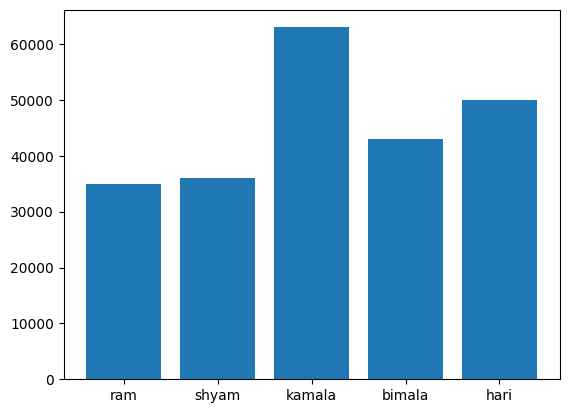

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=['ram','shyam','kamala','bimala','hari']
y=[35000,36000,63000,43000,50000]
plt.bar(x,y)

In [ ]:
import pandas as pd
import numpy as np
data = {
  "ID": [1,2,3,4,5],
  "Name": ['ram','shyam','kamala','bimala','hari'],
    "Age":[25,20,33,34,31],
    "Location":['kathmandu','kathmandu','pokhara','pokhara',np.nan],
    "Salary":[35000,36000,63000,np.nan,50000]
}
df = pd.DataFrame(data)
new = df.groupby('Location')['Salary'].mean().reset_index()
print(new)

    Location   Salary
0  kathmandu  35500.0
1    pokhara  63000.0
